STEP 1: DEFINE TRUE PARALLEL LINES
Number of lines: 4
True positions (face-on, parallel): [0. 1. 2. 3.]
True spacing: [1. 1. 1.]
All spacings equal: True


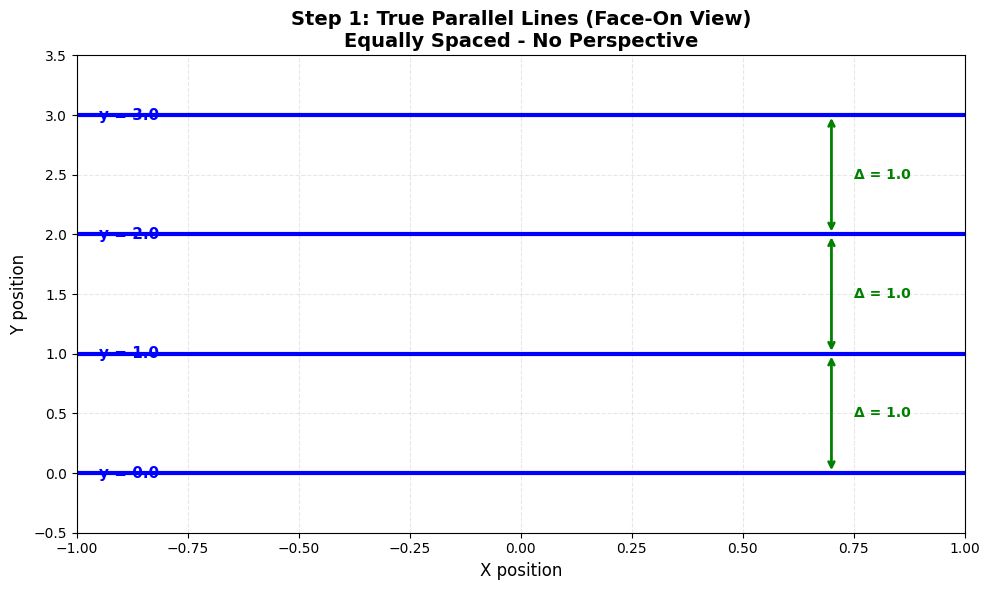

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Step 1: Define 4 parallel lines in 3D space (face-on they are parallel)
# In the "true" 3D space, these are parallel lines at equal spacing
# We'll define them by their y-positions (assuming they're horizontal lines)
num_true_lines = 4  # Define globally so other cells can use it
true_spacing = 1.0  # Equal spacing when viewed face-on
true_positions = np.array([0.0, 1.0, 2.0, 3.0])  # 4 parallel lines

print("="*60)
print("STEP 1: DEFINE TRUE PARALLEL LINES")
print("="*60)
print(f"Number of lines: {num_true_lines}")
print(f"True positions (face-on, parallel): {true_positions}")
print(f"True spacing: {np.diff(true_positions)}")
print(f"All spacings equal: {np.allclose(np.diff(true_positions), true_spacing)}")

# Visualization for Step 1
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i, pos in enumerate(true_positions):
    ax.axhline(y=pos, color='blue', linewidth=3, label=f'Line {i}' if i == 0 else '')
    ax.text(-0.95, pos, f'y = {pos:.1f}', va='center', fontsize=11, weight='bold', color='blue')

ax.set_xlim(-1, 1)
ax.set_ylim(-0.5, true_positions[-1] + 0.5)
ax.set_xlabel('X position', fontsize=12)
ax.set_ylabel('Y position', fontsize=12)
ax.set_title('Step 1: True Parallel Lines (Face-On View)\nEqually Spaced - No Perspective', fontsize=14, weight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Add spacing annotations
for i in range(len(true_positions) - 1):
    mid_y = (true_positions[i] + true_positions[i+1]) / 2
    spacing = true_positions[i+1] - true_positions[i]
    ax.annotate('', xy=(0.7, true_positions[i]), xytext=(0.7, true_positions[i+1]),
                arrowprops=dict(arrowstyle='<->', color='green', lw=2))
    ax.text(0.75, mid_y, f'Δ = {spacing:.1f}', va='center', fontsize=10, 
            color='green', weight='bold')

plt.tight_layout()
plt.show()

STEP 2: APPLY PERSPECTIVE TRANSFORMATION
Möbius transform: f(x) = (ax + b) / (cx + d)
Parameters: a=1.0, b=0.0, c=0.3, d=1.0

Observed positions (with perspective): [0.         0.76923077 1.25       1.57894737]
Observed spacing: [0.76923077 0.48076923 0.32894737]

Notice: spacing is no longer uniform due to perspective!


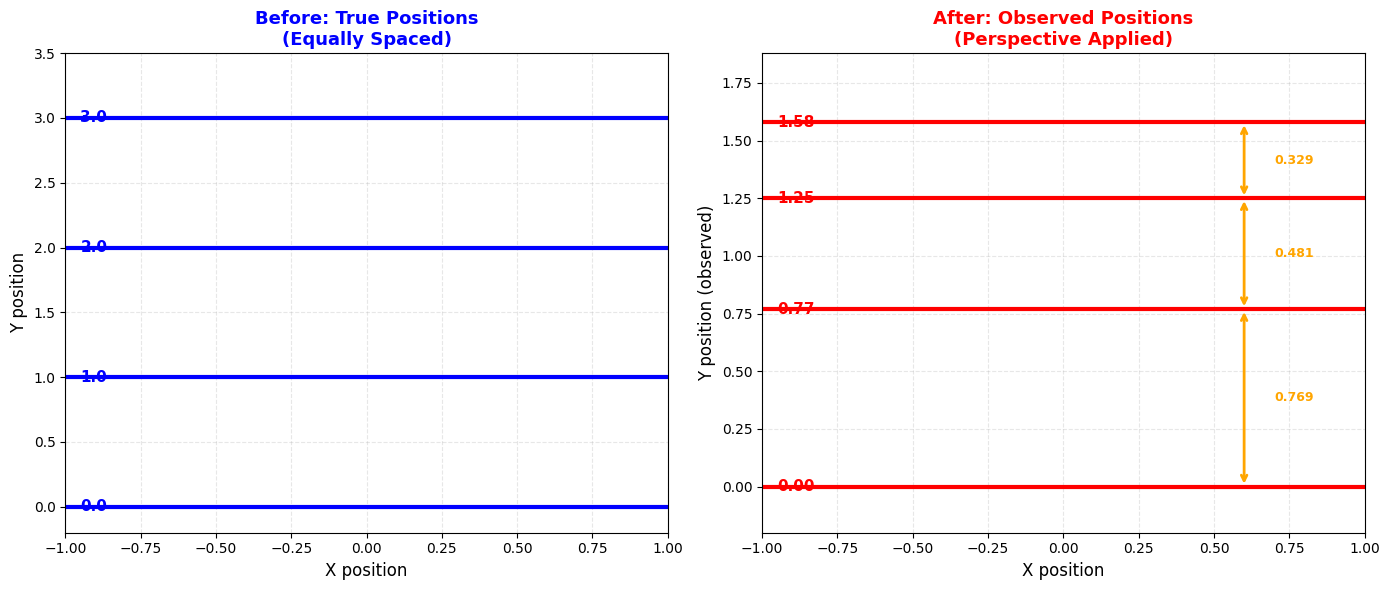

In [17]:
# Step 2: Simulate perspective transformation
# Apply a projective transformation to simulate viewing angle
# For simplicity, simulate observed positions after perspective distortion

# Simulate some perspective parameters (these will be what we try to recover)
actual_a, actual_b, actual_c, actual_d = 1.0, 0.0, 0.3, 1.0

def mobius_transform(x, a, b, c, d):
    """Möbius transformation: f(x) = (ax + b) / (cx + d)"""
    return (a * x + b) / (c * x + d)

# Apply perspective to the true positions to get observed positions
observed_positions = mobius_transform(true_positions, actual_a, actual_b, actual_c, actual_d)

print("="*60)
print("STEP 2: APPLY PERSPECTIVE TRANSFORMATION")
print("="*60)
print(f"Möbius transform: f(x) = (ax + b) / (cx + d)")
print(f"Parameters: a={actual_a}, b={actual_b}, c={actual_c}, d={actual_d}")
print(f"\nObserved positions (with perspective): {observed_positions}")
print(f"Observed spacing: {np.diff(observed_positions)}")
print(f"\nNotice: spacing is no longer uniform due to perspective!")

# Visualization for Step 2
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: True positions
ax1 = axes[0]
for i, pos in enumerate(true_positions):
    ax1.axhline(y=pos, color='blue', linewidth=3)
    ax1.text(-0.95, pos, f'{pos:.1f}', va='center', fontsize=11, weight='bold', color='blue')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-0.2, true_positions[-1] + 0.5)
ax1.set_xlabel('X position', fontsize=12)
ax1.set_ylabel('Y position', fontsize=12)
ax1.set_title('Before: True Positions\n(Equally Spaced)', fontsize=13, weight='bold', color='blue')
ax1.grid(True, alpha=0.3, linestyle='--')

# Right plot: Observed positions
ax2 = axes[1]
for i, pos in enumerate(observed_positions):
    ax2.axhline(y=pos, color='red', linewidth=3)
    ax2.text(-0.95, pos, f'{pos:.2f}', va='center', fontsize=11, weight='bold', color='red')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-0.2, observed_positions[-1] + 0.3)
ax2.set_xlabel('X position', fontsize=12)
ax2.set_ylabel('Y position (observed)', fontsize=12)
ax2.set_title('After: Observed Positions\n(Perspective Applied)', fontsize=13, weight='bold', color='red')
ax2.grid(True, alpha=0.3, linestyle='--')

# Add spacing annotations on observed
for i in range(len(observed_positions) - 1):
    mid_y = (observed_positions[i] + observed_positions[i+1]) / 2
    spacing = observed_positions[i+1] - observed_positions[i]
    ax2.annotate('', xy=(0.6, observed_positions[i]), xytext=(0.6, observed_positions[i+1]),
                arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
    ax2.text(0.7, mid_y, f'{spacing:.3f}', va='center', fontsize=9, 
            color='orange', weight='bold')

plt.tight_layout()
plt.show()

STEP 3: ESTIMATE PERSPECTIVE PARAMETERS
Goal: Find a,b,c,d that map equally-spaced inputs to observed outputs

Actual parameters:    a=1.000000, b=0.000000, c=0.300000, d=1.000000
Estimated parameters: a=1.000000, b=-0.000000, c=0.300000, d=1.000000

Optimization success: True
Residual norm: 2.22e-16

Observed positions:      [0.         0.76923077 1.25       1.57894737]
Reconstructed positions: [-5.78706889e-18  7.69230769e-01  1.25000000e+00  1.57894737e+00]
Reconstruction error:    2.22e-16


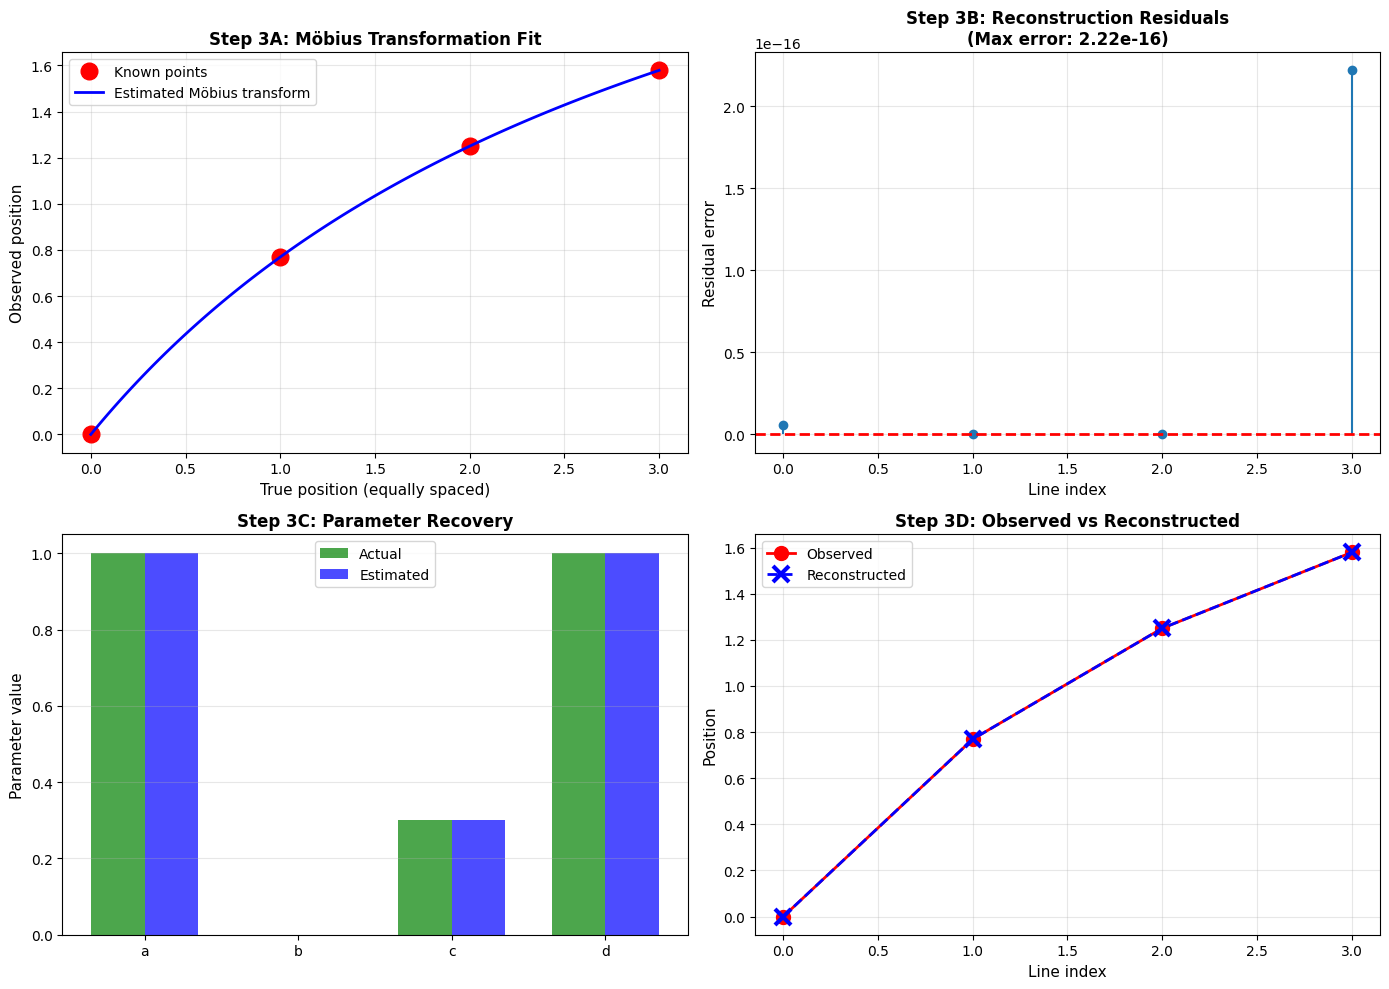

In [18]:
# Step 3: Estimate perspective parameters from observed positions
# We know that the true positions are equally spaced (parallel lines)
# We need to find a,b,c,d such that mobius_transform maps equally spaced points to observed positions

def estimate_mobius_params(observed, num_true_lines=4, true_spacing=1.0):
    """
    Estimate Möbius transformation parameters from observed positions.
    
    Assumes the true positions are equally spaced starting from 0.
    Uses the constraint that Möbius transformations form a 3-parameter family (up to scaling).
    We can normalize by setting d=1.
    """
    # True positions (equally spaced, parallel when face-on)
    true_pos = np.arange(num_true_lines) * true_spacing
    
    # Define residual function
    def residuals(params):
        a, b, c = params
        d = 1.0  # Normalize
        predicted = mobius_transform(true_pos, a, b, c, d)
        return predicted - observed
    
    # Initial guess
    x0 = [1.0, 0.0, 0.0]
    
    # Solve
    result = least_squares(residuals, x0, method='lm')
    
    a, b, c = result.x
    d = 1.0
    
    return a, b, c, d, result

# Estimate parameters from observed positions
est_a, est_b, est_c, est_d, result = estimate_mobius_params(observed_positions)

print("="*60)
print("STEP 3: ESTIMATE PERSPECTIVE PARAMETERS")
print("="*60)
print(f"Goal: Find a,b,c,d that map equally-spaced inputs to observed outputs")
print(f"\nActual parameters:    a={actual_a:.6f}, b={actual_b:.6f}, c={actual_c:.6f}, d={actual_d:.6f}")
print(f"Estimated parameters: a={est_a:.6f}, b={est_b:.6f}, c={est_c:.6f}, d={est_d:.6f}")
print(f"\nOptimization success: {result.success}")
print(f"Residual norm: {np.linalg.norm(result.fun):.2e}")

# Verify the fit
reconstructed = mobius_transform(true_positions, est_a, est_b, est_c, est_d)
print(f"\nObserved positions:      {observed_positions}")
print(f"Reconstructed positions: {reconstructed}")
print(f"Reconstruction error:    {np.linalg.norm(observed_positions - reconstructed):.2e}")

# Visualization for Step 3: Show the mapping
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Input vs Output
ax1 = axes[0, 0]
ax1.plot(true_positions, observed_positions, 'ro', markersize=12, label='Known points')
x_fine = np.linspace(true_positions[0], true_positions[-1], 100)
y_fine = mobius_transform(x_fine, est_a, est_b, est_c, est_d)
ax1.plot(x_fine, y_fine, 'b-', linewidth=2, label='Estimated Möbius transform')
ax1.set_xlabel('True position (equally spaced)', fontsize=11)
ax1.set_ylabel('Observed position', fontsize=11)
ax1.set_title('Step 3A: Möbius Transformation Fit', fontsize=12, weight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
ax2 = axes[0, 1]
residuals_vals = observed_positions - reconstructed
ax2.stem(range(len(residuals_vals)), residuals_vals, basefmt=' ')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Line index', fontsize=11)
ax2.set_ylabel('Residual error', fontsize=11)
ax2.set_title(f'Step 3B: Reconstruction Residuals\n(Max error: {np.max(np.abs(residuals_vals)):.2e})', 
              fontsize=12, weight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Parameter comparison
ax3 = axes[1, 0]
params_actual = [actual_a, actual_b, actual_c, actual_d]
params_estimated = [est_a, est_b, est_c, est_d]
x_pos = np.arange(4)
width = 0.35
ax3.bar(x_pos - width/2, params_actual, width, label='Actual', color='green', alpha=0.7)
ax3.bar(x_pos + width/2, params_estimated, width, label='Estimated', color='blue', alpha=0.7)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['a', 'b', 'c', 'd'])
ax3.set_ylabel('Parameter value', fontsize=11)
ax3.set_title('Step 3C: Parameter Recovery', fontsize=12, weight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Observed vs Reconstructed
ax4 = axes[1, 1]
ax4.plot(observed_positions, 'ro-', markersize=10, linewidth=2, label='Observed')
ax4.plot(reconstructed, 'bx--', markersize=12, linewidth=2, label='Reconstructed', markeredgewidth=3)
ax4.set_xlabel('Line index', fontsize=11)
ax4.set_ylabel('Position', fontsize=11)
ax4.set_title('Step 3D: Observed vs Reconstructed', fontsize=12, weight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

STEP 4: CONTINUE THE PATTERN
Original 4 lines (observed): [0.         0.76923077 1.25       1.57894737]

Extended to 10 lines:
Predicted observed positions: [-5.78706889e-18  7.69230769e-01  1.25000000e+00  1.57894737e+00
  1.81818182e+00  2.00000000e+00  2.14285714e+00  2.25806452e+00
  2.35294118e+00  2.43243243e+00]

Predicted spacing: [0.76923077 0.48076923 0.32894737 0.23923445 0.18181818 0.14285714
 0.11520737 0.09487666 0.07949126]

Notice how spacing continues to decrease with perspective!


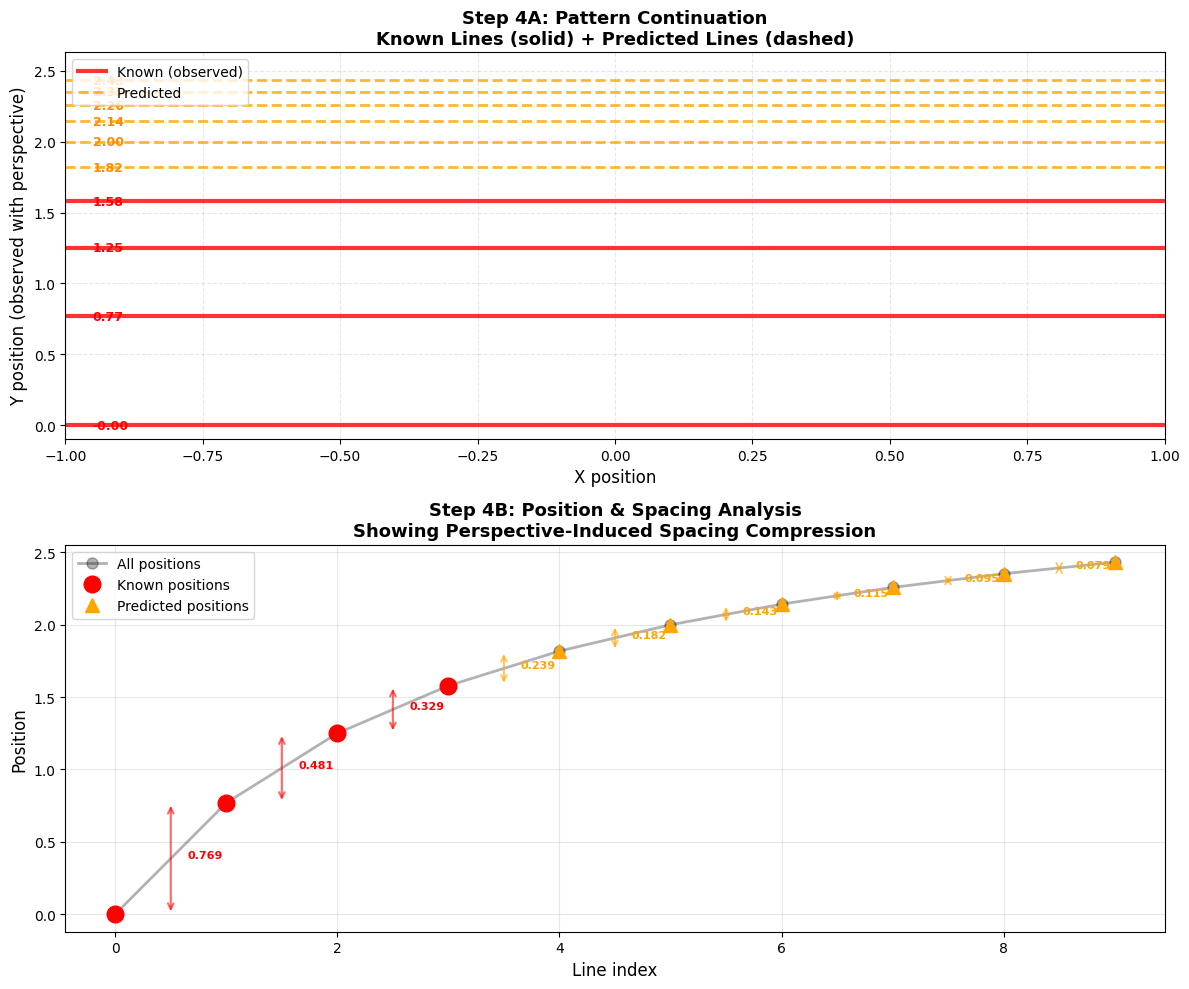

In [19]:
# Step 4: Continue the pattern - predict additional parallel lines
# Now that we have the perspective parameters, we can predict where additional lines would appear

# Generate more equally-spaced true positions
num_additional_lines = 6
extended_true_positions = np.arange(num_true_lines + num_additional_lines) * true_spacing

# Apply the estimated transformation to predict observed positions
predicted_observed = mobius_transform(extended_true_positions, est_a, est_b, est_c, est_d)

print("="*60)
print("STEP 4: CONTINUE THE PATTERN")
print("="*60)
print(f"Original {num_true_lines} lines (observed): {observed_positions}")
print(f"\nExtended to {len(extended_true_positions)} lines:")
print(f"Predicted observed positions: {predicted_observed}")
print(f"\nPredicted spacing: {np.diff(predicted_observed)}")
print(f"\nNotice how spacing continues to decrease with perspective!")

# Visualization for Step 4
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Line positions view
ax1 = axes[0]
for i, pos in enumerate(predicted_observed):
    if i < num_true_lines:
        color = 'red'
        linewidth = 3
        linestyle = '-'
        label = 'Known (observed)' if i == 0 else ''
    else:
        color = 'orange'
        linewidth = 2
        linestyle = '--'
        label = 'Predicted' if i == num_true_lines else ''
    
    ax1.axhline(y=pos, color=color, linewidth=linewidth, linestyle=linestyle, label=label, alpha=0.8)
    ax1.text(-0.95, pos, f'{pos:.2f}', va='center', fontsize=9, weight='bold', 
            color=color if i < num_true_lines else 'darkorange')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-0.1, predicted_observed[-1] + 0.2)
ax1.set_xlabel('X position', fontsize=12)
ax1.set_ylabel('Y position (observed with perspective)', fontsize=12)
ax1.set_title('Step 4A: Pattern Continuation\nKnown Lines (solid) + Predicted Lines (dashed)', 
              fontsize=13, weight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# Plot 2: Spacing analysis
ax2 = axes[1]
line_indices = np.arange(len(predicted_observed))
known_indices = np.arange(num_true_lines)
predicted_indices = np.arange(num_true_lines, len(predicted_observed))

# Plot positions
ax2.plot(line_indices, predicted_observed, 'ko-', linewidth=2, markersize=8, 
         label='All positions', alpha=0.3)
ax2.plot(known_indices, observed_positions, 'ro', markersize=12, 
         label='Known positions', zorder=3)
ax2.plot(predicted_indices, predicted_observed[num_true_lines:], '^', 
         color='orange', markersize=10, label='Predicted positions', zorder=3)

# Add spacing bars
spacings = np.diff(predicted_observed)
for i in range(len(spacings)):
    mid_x = i + 0.5
    mid_y = (predicted_observed[i] + predicted_observed[i+1]) / 2
    color = 'red' if i < num_true_lines - 1 else 'orange'
    ax2.annotate('', xy=(mid_x, predicted_observed[i]), xytext=(mid_x, predicted_observed[i+1]),
                arrowprops=dict(arrowstyle='<->', color=color, lw=1.5, alpha=0.6))
    ax2.text(mid_x + 0.15, mid_y, f'{spacings[i]:.3f}', fontsize=8, 
            color=color, weight='bold')

ax2.set_xlabel('Line index', fontsize=12)
ax2.set_ylabel('Position', fontsize=12)
ax2.set_title('Step 4B: Position & Spacing Analysis\nShowing Perspective-Induced Spacing Compression', 
              fontsize=13, weight='bold')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

STEP 5: SUMMARY - COMPLETE PIPELINE


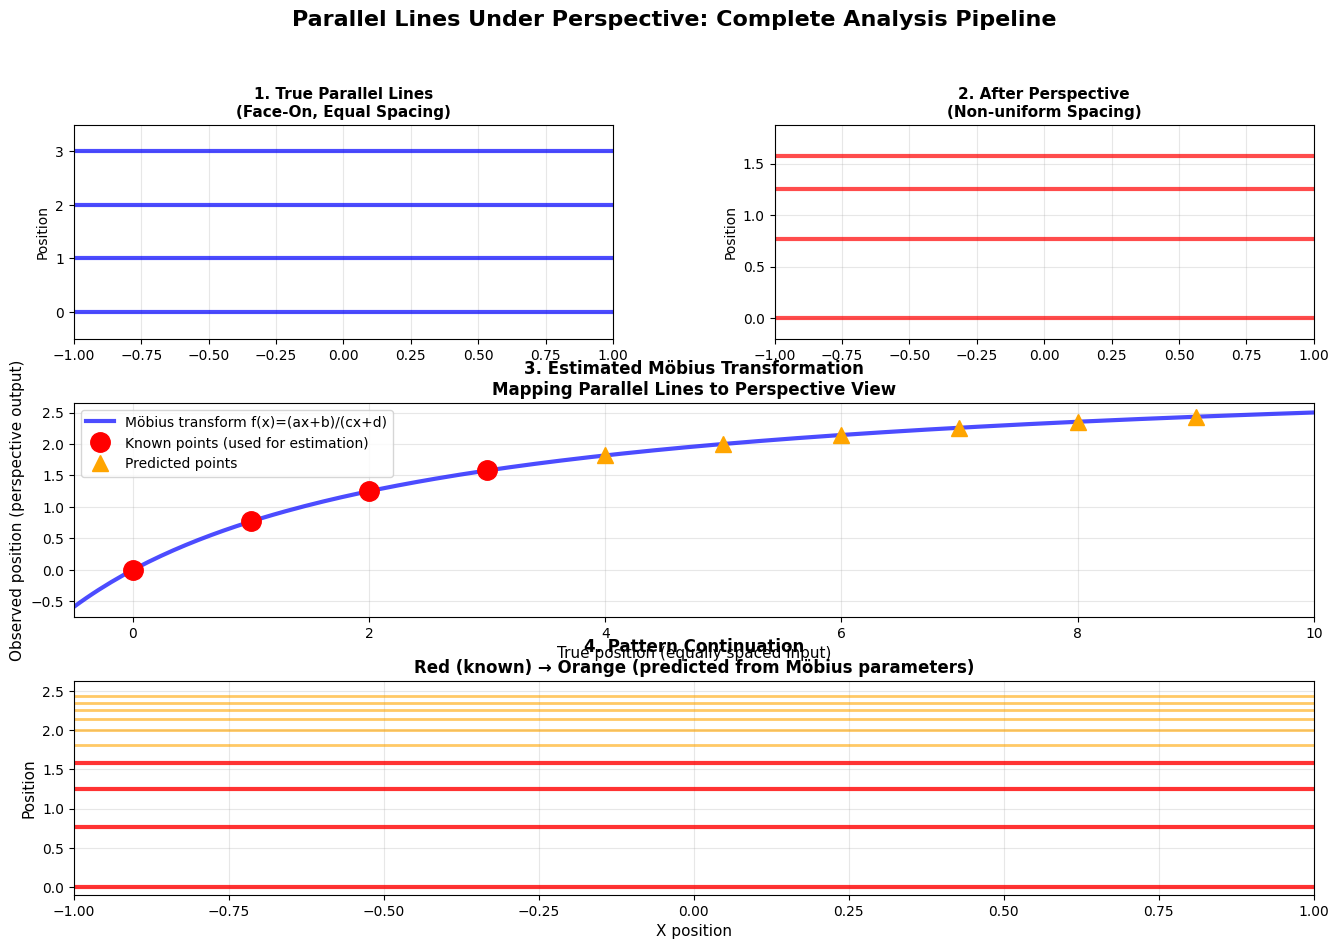


Summary:
  - Started with 4 parallel lines (equal spacing = 1.0)
  - Applied perspective transform with parameters: a=1.0, b=0.0, c=0.3, d=1.0
  - Recovered parameters: a=1.000000, b=-0.000000, c=0.300000, d=1.000000
  - Extended pattern to 10 lines total
  - Perspective causes spacing to compress from 0.769 to 0.079


In [20]:
# Step 5: Summary Visualization - Compare All Stages
print("="*60)
print("STEP 5: SUMMARY - COMPLETE PIPELINE")
print("="*60)

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Top left: True parallel lines
ax1 = fig.add_subplot(gs[0, 0])
for i, pos in enumerate(true_positions):
    ax1.axhline(y=pos, color='blue', linewidth=3, alpha=0.7)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-0.5, true_positions[-1] + 0.5)
ax1.set_title('1. True Parallel Lines\n(Face-On, Equal Spacing)', fontsize=11, weight='bold')
ax1.set_ylabel('Position', fontsize=10)
ax1.grid(True, alpha=0.3)

# Top right: After perspective
ax2 = fig.add_subplot(gs[0, 1])
for i, pos in enumerate(observed_positions):
    ax2.axhline(y=pos, color='red', linewidth=3, alpha=0.7)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-0.2, observed_positions[-1] + 0.3)
ax2.set_title('2. After Perspective\n(Non-uniform Spacing)', fontsize=11, weight='bold')
ax2.set_ylabel('Position', fontsize=10)
ax2.grid(True, alpha=0.3)

# Middle: Möbius transformation curve
ax3 = fig.add_subplot(gs[1, :])
x_range = np.linspace(-0.5, 10, 200)
y_transform = mobius_transform(x_range, est_a, est_b, est_c, est_d)
ax3.plot(x_range, y_transform, 'b-', linewidth=3, label='Möbius transform f(x)=(ax+b)/(cx+d)', alpha=0.7)
ax3.plot(true_positions, observed_positions, 'ro', markersize=14, label='Known points (used for estimation)', zorder=5)
ax3.plot(extended_true_positions[num_true_lines:], predicted_observed[num_true_lines:], 
         '^', color='orange', markersize=12, label='Predicted points', zorder=5)
ax3.set_xlabel('True position (equally spaced input)', fontsize=11)
ax3.set_ylabel('Observed position (perspective output)', fontsize=11)
ax3.set_title('3. Estimated Möbius Transformation\nMapping Parallel Lines to Perspective View', 
              fontsize=12, weight='bold')
ax3.legend(fontsize=10, loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-0.5, 10)

# Bottom: Extended pattern
ax4 = fig.add_subplot(gs[2, :])
for i, pos in enumerate(predicted_observed):
    if i < num_true_lines:
        color = 'red'
        linewidth = 3
        alpha = 0.8
    else:
        color = 'orange'
        linewidth = 2
        alpha = 0.6
    ax4.axhline(y=pos, color=color, linewidth=linewidth, alpha=alpha)

ax4.set_xlim(-1, 1)
ax4.set_ylim(-0.1, predicted_observed[-1] + 0.2)
ax4.set_xlabel('X position', fontsize=11)
ax4.set_ylabel('Position', fontsize=11)
ax4.set_title('4. Pattern Continuation\nRed (known) → Orange (predicted from Möbius parameters)', 
              fontsize=12, weight='bold')
ax4.grid(True, alpha=0.3)

# Add overall title
fig.suptitle('Parallel Lines Under Perspective: Complete Analysis Pipeline', 
             fontsize=16, weight='bold', y=0.995)

plt.show()

print(f"\nSummary:")
print(f"  - Started with {num_true_lines} parallel lines (equal spacing = {true_spacing})")
print(f"  - Applied perspective transform with parameters: a={actual_a}, b={actual_b}, c={actual_c}, d={actual_d}")
print(f"  - Recovered parameters: a={est_a:.6f}, b={est_b:.6f}, c={est_c:.6f}, d={est_d:.6f}")
print(f"  - Extended pattern to {len(extended_true_positions)} lines total")
print(f"  - Perspective causes spacing to compress from {np.diff(observed_positions)[0]:.3f} to {np.diff(predicted_observed)[-1]:.3f}")